In [1]:
import torch

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Linear Regression in 1d

In [ ]:
from torch.nn import Linear

In [ ]:
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(list(model.parameters()))

x = torch.tensor([[0.], [1.], [2.]])
y_hat = model(x)
y_hat

### Custom Module

Wrap custom objects to make more complex modules (=class)

In [ ]:
import torch.nn as nn

In [ ]:
class LR(nn.Module):
    def __init__(self,in_size,output_size):
        super(LR,self).__init__()
        self.linear=nn.Linear(in_size,output_size)
        
    def forward(self, x):
        out=self.linear(x)
        return out
        

class LR is a child of nn.Module => it inherits all its attributes and methods

In [ ]:
model = LR(1,1)
model.state_dict()['linear.weight'].data[0] = torch.tensor([0.5153])
model.state_dict()['linear.bias'].data[0] = torch.tensor([-0.4414])
print(list(model.parameters()))

x = torch.tensor([[1.0], [2.0]])
y_hat = model(x)
y_hat

In [ ]:
model.state_dict().values()

### LR Example with class

In [ ]:
class linear_model_2:
    
    def __init__(self, X, y):
        self.X = torch.cat((torch.ones(len(X)).view(-1,1), X), dim=1)
        self.y = y
        
    def normalize(self):
        self.X[:, 1:] = (self.X[:, 1:]-torch.mean(self.X[:, 1:], 0))/torch.std(self.X[:, 1:], 0)
        
    def fit(self):
        beta = torch.mm(torch.inverse(torch.mm(self.X.T,self.X)), torch.mm(self.X.T,self.y))
        return beta
    
    def estimate(self, beta, custom_range):
        return torch.mm(torch.cat((torch.ones(int(custom_range[1]-custom_range[0])).view(-1,1), torch.arange(custom_range[0],custom_range[1],1).view(-1,1)), dim=1),beta)
    
    def plot(self, custom_range):
        plt.plot(self.X[:,-1].numpy(), self.y.numpy(), 'o', label='true values')
        plt.plot(torch.arange(custom_range[0], custom_range[1], 1), self.estimate(beta, custom_range).numpy(), label='y_hat')
        plt.legend()
        plt.show()
        
    @classmethod
    def add_intercept(cls, X):
        cls.range = custom_range
        return X, y
    
    @staticmethod
    def stat():
        pass
        

In [ ]:
X = torch.tensor([[1.], [2.], [3.], [4.], [5.], [6.], [7.]])
y = torch.tensor([[-15.], [1.], [3.], [6.], [7.], [12.], [14.]])

In [ ]:
#X = torch.arange(1., 101., 1.)
#y = torch.arange(1., 101., 1.) + torch.normal(mean=torch.zeros(100), std=torch.ones(100))

In [ ]:
#class method test
#mod = linear_model_2.add_intercept()

In [ ]:
mod = linear_model_2(X,y)

mod.normalize()
print(mod.X)

beta = mod.fit()
print('beta: ', beta)

mod.estimate(beta, (0., 10.))
mod.plot((-10., 20.))

### Inheritance / subclass

In [ ]:
class linear_model_3(linear_model_2):
    
    def __init__(self, X, y, option):
        super().__init__(X,y) #parent class handles X,y
        self.option = option #subclass handles the new attribute

In [ ]:
mod_2 = linear_model_3(X,y)

In [ ]:
print(help(linear_model_3))

### Training: Batch GD

In [ ]:
w = torch.tensor(-15., requires_grad=True)
b = torch.tensor(-10., requires_grad=True)
X = torch.arange(-3., 3., .1).view(-1,1)
f = X-1

plt.plot(X.numpy(), f.numpy())

Y = f + 0.1*torch.randn(X.size())

plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.show()

def forward(x):
    return w*x+b

def criterion(yhat, y):
    return torch.mean((yhat-y)**2)

In [ ]:
lr = 0.1
COST = []

for epoch in range(150):
    Yhat = forward(X)
    loss = criterion(Yhat, Y)
    loss.backward() #computes derivatives wrt variables in loss
    
    #w.grad
    w.data = w.data - lr*w.grad.data
    w.grad.data.zero_()
    
    #b.grad
    b.data = b.data - lr*b.grad.data
    b.grad.data.zero_()
    
    COST.append(loss.item())
    

In [ ]:
plt.plot(COST)
plt.xlabel('COST')
plt.ylabel('Epoch')
plt.show()

In [ ]:
plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.plot(X.numpy(), Yhat.detach().numpy())
plt.show()

print('w: ', w)
print('b: ', b)

### Stochastic GD

In [ ]:
lr = 0.1
COST = []

for epoch in range(15):
    total = 0
    for x,y in zip(X,Y):
        Yhat = forward(X)
        loss = criterion(Yhat, Y)
        loss.backward() #computes derivatives wrt variables in loss

        w.data = w.data - lr*w.grad.data
        b.data = b.data - lr*b.grad.data
        
        w.grad.data.zero_()
        b.grad.data.zero_()
        
        total += loss.item()
        
    COST.append(total)

In [ ]:
plt.plot(COST)
plt.xlabel('COST')
plt.ylabel('Epoch')
plt.show()

In [ ]:
plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.plot(X.numpy(), Yhat.detach().numpy())
plt.show()

print('w: ', w)
print('b: ', b)

## SGD with Data Loader

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
class Data(Dataset):
    
    def __init__(self):
        self.x = torch.arange(-3,3,.1).view(-1,1)
        self.y = -3*X+1
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len
    

In [ ]:
dataset = Data()
trainloader = DataLoader(dataset=dataset, batch_size=1)

In [ ]:
lr = 0.1
LOSS = []

for epoch in range(5):
    for x,y in trainloader:
        yhat = forward(x)
        loss = criterion(yhat, y)
        loss.backward() #computes derivatives wrt variables in loss

        w.data = w.data - lr*w.grad.data
        b.data = b.data - lr*b.grad.data
        
        w.grad.data.zero_()
        b.grad.data.zero_()
        
        LOSS.append(loss.item())
    

In [ ]:
plt.plot(LOSS)
plt.xlabel('LOSS')
plt.ylabel('Epoch')
plt.show()

In [ ]:
plt.plot(X.numpy(), dataset.y.numpy(), 'ro')
plt.plot(X.numpy(), forward(X).detach().numpy())
plt.show()

print('w: ', w)
print('b: ', b)

### Mini-batch GD

In [ ]:
dataset = Data()
trainloader = DataLoader(dataset=dataset, batch_size=5) # set nb of mini-batches

In [ ]:
lr = 0.1
LOSS = []

for epoch in range(5):
    for x,y in trainloader:
        yhat = forward(x)
        loss = criterion(yhat, y)
        loss.backward() #computes derivatives wrt variables in loss

        w.data = w.data - lr*w.grad.data
        b.data = b.data - lr*b.grad.data
        
        w.grad.data.zero_()
        b.grad.data.zero_()
            
        LOSS.append(loss.item())
    
    

In [ ]:
plt.plot(LOSS)
plt.xlabel('LOSS')
plt.ylabel('Epoch')
plt.show()

In [ ]:
plt.plot(X.numpy(), dataset.y.numpy(), 'ro')
plt.plot(X.numpy(), forward(X).detach().numpy())
plt.show()

print('w: ', w)
print('b: ', b)

### PyTorch Optimizer

In [23]:
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
torch.manual_seed(1)

In [16]:
class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = 1 * self.x - 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):    
        return self.x[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [24]:
dataset = Data()

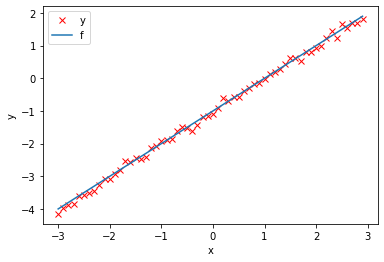

In [26]:
plt.plot(dataset.x.numpy(), dataset.y.numpy(), 'rx', label = 'y')
plt.plot(dataset.x.numpy(), dataset.f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [60]:
class Linear_Regression(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(Linear_Regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        yhat = self.linear(x)
        return yhat
    

In [61]:
criterion = nn.MSELoss()

In [62]:
model = Linear_Regression(1,1)

In [63]:
from torch import nn, optim

In [64]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'params': [4810973976, 4810976856]}]}

In [65]:
model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10
model.state_dict()

OrderedDict([('linear.weight', tensor([[-15.]])),
             ('linear.bias', tensor([-10.]))])

In [66]:
list(model.parameters())

[Parameter containing:
 tensor([[-15.]], requires_grad=True), Parameter containing:
 tensor([-10.], requires_grad=True)]

In [98]:
trainloader = DataLoader(dataset=dataset, batch_size=3)

In [99]:
def train_model_BGD(iter):
    
    LOSS = []
    for epoch in range(iter):
        total=0
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward() #differentiates the loss
            optimizer.step() #updates the parameters
            total += loss.item()
        LOSS.append(total)
        
    plt.plot(LOSS)
    plt.xlabel('Epoch')
    plt.ylabel('LOSS')
    plt.show()

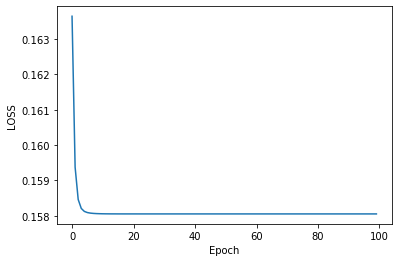

In [100]:
train_model_BGD(100)

In [101]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[1.0014]])),
             ('linear.bias', tensor([-1.0214]))])

### Train/Validation/Test data

In [102]:
# Use TRN to train different models from different hyper-parameters
# USE VAL to select model which has lowest Loss

In [105]:
# Import libraries we need for this lab, and set the random seed

from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim

In [103]:
# Create Data class

from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    
    # Constructor
    def __init__(self, train = True):
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            
            #outliers 
            if train == True:
                self.y[0] = 0
                self.y[50:55] = 20
            else:
                pass
      
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [104]:
# Create training dataset and validation dataset

train_data = Data()
val_data = Data(train = False)

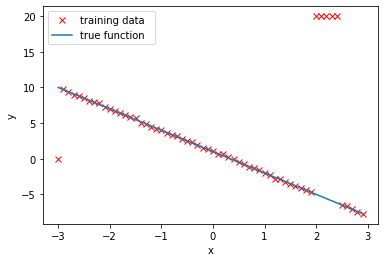

In [106]:
# Plot out training points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr',label="training data ")
plt.plot(train_data.x.numpy(), train_data.f.numpy(),label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [107]:
# Create Linear Regression Class

from torch import nn

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [108]:
# Create MSELoss function and DataLoader

criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

In [109]:
# Create Learning Rate list, the error lists and the MODELS list

learning_rates=[0.0001, 0.001, 0.01, 0.1]

train_error=torch.zeros(len(learning_rates))
validation_error=torch.zeros(len(learning_rates))

MODELS=[]

In [110]:
# Define the train model function and train the model

def train_model_with_lr (iter, lr_list):
    
    # iterate through different learning rates 
    for i, lr in enumerate(lr_list):
        model = linear_regression(1, 1)
        optimizer = optim.SGD(model.parameters(), lr = lr)
        for epoch in range(iter):
            for x, y in trainloader:
                yhat = model(x)
                loss = criterion(yhat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
        # train data
        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()
    
        # validation data
        Yhat = model(val_data.x)
        val_loss = criterion(Yhat, val_data.y)
        validation_error[i] = val_loss.item()
        MODELS.append(model)

train_model_with_lr(10, learning_rates)

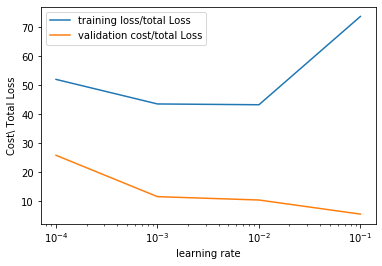

In [111]:
# Plot the training loss and validation loss

plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

i [[1.1018   ]
 [1.0951009]
 [1.0884017]]
i [[5.853698]
 [5.736599]
 [5.6195  ]]
i [[6.620593]
 [6.485898]
 [6.351202]]
i [[14.423332]
 [13.990945]
 [13.558557]]


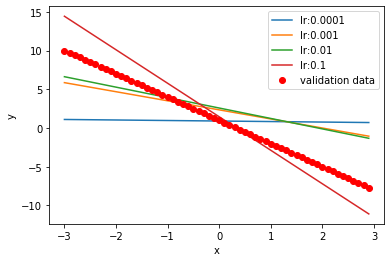

In [112]:
# Plot the predictions

i = 0
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    print('i', yhat.detach().numpy()[0:3])
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()